In [1]:
# # *** Google Colab Prep ***#
# from google.colab import drive
# drive.mount('/content/drive')
# drive.mount('/content/NYPD_Complaint_Data_Historic.csv')

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


# import library

In [7]:
# simplify the package in a short name. Below are the standard names people use for Pandas, Numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Dense
import tensorflow as tf
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
import keras
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import plotly.express as px
%matplotlib auto
%matplotlib inline

2022-08-07 20:51:40.037552: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-07 20:51:40.037585: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Using matplotlib backend: <object object at 0x7f96d3d5a1a0>


#Importing CSV files

In [8]:
# import dataset with the read_csv function from pandas, giving it the URL for CSV file, and assigning the resulting dataframe to data_crime.
data_crime = pd.read_csv('NYPD_Complaint_Data_Historic.csv' ,low_memory = False)
types = data_crime.OFNS_DESC.unique()

In [9]:
crime_map = pd.read_csv('Crime_Map_.csv')

# Previewing dataframes

In [10]:
data_crime

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,744350707,12/17/2018,03:00:00,12/17/2018,03:05:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,916.0,...,NaN,NaN,40.887333,-73.847250,"(40.887332818, -73.847250013)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
7825495,380927470,06/05/2018,23:30:00,06/06/2018,11:00:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,450.0,...,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK,M
7825496,502083804,02/10/2018,08:30:00,02/10/2018,08:45:00,42.0,02/10/2018,341,PETIT LARCENY,339.0,...,U,NaN,40.834528,-73.903836,"(40.834528146, -73.903836069)",PATROL BORO BRONX,NaN,45-64,BLACK,F
7825497,609916130,12/11/2018,07:30:00,12/11/2018,07:50:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,U,NaN,40.811812,-73.938329,"(40.81181176, -73.938328651)",PATROL BORO MAN NORTH,NaN,<18,BLACK,M


In [11]:
print(str(types))

['DANGEROUS WEAPONS' 'FORGERY' 'HARRASSMENT 2' 'MISCELLANEOUS PENAL LAW'
 'MURDER & NON-NEGL. MANSLAUGHTER' 'BURGLARY' 'DANGEROUS DRUGS'
 'PETIT LARCENY' 'OFF. AGNST PUB ORD SENSBLTY &' 'GRAND LARCENY'
 'FELONY ASSAULT' 'ASSAULT 3 & RELATED OFFENSES' 'ARSON' 'RAPE'
 'SEX CRIMES' 'GRAND LARCENY OF MOTOR VEHICLE' 'ROBBERY'
 'CRIMINAL MISCHIEF & RELATED OF' 'THEFT-FRAUD' 'VEHICLE AND TRAFFIC LAWS'
 'CRIMINAL TRESPASS' 'OFFENSES INVOLVING FRAUD' 'FRAUDS'
 'OFFENSES AGAINST PUBLIC ADMINI' 'OFFENSES AGAINST THE PERSON'
 'ADMINISTRATIVE CODE' 'INTOXICATED & IMPAIRED DRIVING' 'ESCAPE 3'
 'NYS LAWS-UNCLASSIFIED FELONY' 'POSSESSION OF STOLEN PROPERTY'
 'THEFT OF SERVICES' 'KIDNAPPING & RELATED OFFENSES'
 'OTHER OFFENSES RELATED TO THEF' 'UNAUTHORIZED USE OF A VEHICLE'
 "BURGLAR'S TOOLS" 'ENDAN WELFARE INCOMP' 'FRAUDULENT ACCOSTING'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'OTHER STATE LAWS (NON PENAL LA'
 'OFFENSES AGAINST PUBLIC SAFETY' 'GAMBLING'
 'PETIT LARCENY OF MOTOR VEHICLE' 'ALCOHOLIC BEV

In [12]:
crime_map

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,240211996,40,BRONX,06/05/2021,19:23:00,NaN,(null),COMPLETED,(null),N.Y. TRANSIT POLICE,...,(null),273.0,"TAMPERING 1,CRIMINAL",TRANSIT - NYC SUBWAY,02/07/2022,1005028,234516,40.810352,-73.924942,"(40.8103518634571, -73.924942325642)"
1,238497788,7,MANHATTAN,01/01/2022,04:00:00,01/01/2022,06:00:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),157.0,RAPE 1,RESIDENCE - APT. HOUSE,01/01/2022,988917,200245,40.716310,-73.983166,"(40.7163099917327, -73.9831660136947)"
2,243004090,105,QUEENS,01/01/2019,00:00:00,12/31/2019,23:59:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),175.0,"SEXUAL ABUSE 3,2",RESIDENCE-HOUSE,04/02/2022,1057738,204079,40.726529,-73.734865,"(40.7265293769835, -73.7348645378882)"
3,243090517,47,BRONX,03/01/2020,00:01:00,12/31/2020,23:59:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE-HOUSE,04/02/2022,1025177,268368,40.903188,-73.851944,"(40.903188, -73.851944)"
4,245183845,94,BROOKLYN,05/16/2000,20:00:00,05/28/2005,00:00:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),157.0,RAPE 1,RESIDENCE - APT. HOUSE,05/15/2022,997282,204143,40.727001,-73.952983,"(40.7270006940205, -73.9529831112437)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209824,245890874,75,BROOKLYN,05/31/2022,17:45:00,05/31/2022,17:46:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),101.0,ASSAULT 3,GAS STATION,05/31/2022,1020932,185703,40.676313,-73.867754,"(40.676313, -73.867754)"
209825,245956536,104,QUEENS,05/31/2022,14:15:00,05/31/2022,14:30:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE - APT. HOUSE,05/31/2022,1013160,197457,40.708604,-73.895723,"(40.708604, -73.895723)"
209826,246008200,25,MANHATTAN,05/31/2022,21:00:00,06/02/2022,21:15:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",BRIDGE,05/31/2022,1002640,231748,40.802751,-73.933575,"(40.80275148, -73.93357496)"
209827,245914266,67,BROOKLYN,05/31/2022,19:37:00,05/31/2022,19:55:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE - APT. HOUSE,05/31/2022,997513,174246,40.644932,-73.952204,"(40.644932, -73.952204)"


In [13]:
# grouping 'BORO_NM', and then aggregate dataframe by values ​​of CMPLNT_NUM and counts and show it.
boro_cries = data_crime.groupby(['BORO_NM']).agg({'CMPLNT_NUM':'count'})

# sort the rows data in dataframe to see the number of crimes from high to low
top_crimes = boro_cries.sort_values('CMPLNT_NUM', ascending=False)

top_crimes.head() 


,CMPLNT_NUM
BORO_NM,
BROOKLYN,2313143
MANHATTAN,1882292
BRONX,1693981
QUEENS,1561712
STATEN ISLAND,361891


In [14]:
# Calculate the proportion of crime rate in each region as a whole
top_crimes_prop = top_crimes.assign(propotion = top_crimes.CMPLNT_NUM / sum(top_crimes.CMPLNT_NUM))

top_crimes_prop = top_crimes_prop.reset_index()

In [15]:
# Extracting information from the streetnames
for i in data_crime['PREM_TYP_DESC'][0:10]:
    print(i)

STREET
STREET
STREET
STREET
nan
RESIDENCE - APT. HOUSE
STREET
STREET
STREET
STREET


In [16]:
data_crime.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1744294
CMPLNT_TO_TM         1739479
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18832
PD_CD                   6761
PD_DESC                 6761
CRM_ATPT_CPTD_CD         168
LAW_CAT_CD                 0
BORO_NM                12480
LOC_OF_OCCUR_DESC    1618063
PREM_TYP_DESC          42015
JURIS_DESC                 0
JURISDICTION_CODE       6761
PARKS_NM             7794644
HADEVELOPT           7477110
HOUSING_PSA          7226206
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4883369
SUSP_RACE            3514828
SUSP_SEX             3648142
TRANSIT_DISTRICT     7653024
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             7218
STATION_NAME         7653024
VIC_AGE_GROUP        1638445
VIC_RACE                 390
VIC_SEX       

In [17]:
# Replacing the NaN values of the text column with the corresponding title value 
data_crime.fillna(0)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,0,0,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,0,0.0,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,0,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,0,0.0,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,0,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,0,0,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,0.0,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,0,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,0,0,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,0.0,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,0,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,0,0,0.0,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,0.0,...,0,0.0,40.698827,-73.938819,"(40.698827283, -73.938819047)",0,0,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,744350707,12/17/2018,03:00:00,12/17/2018,03:05:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,916.0,...,0,0.0,40.887333,-73.847250,"(40.887332818, -73.847250013)",PATROL BORO BRONX,0,25-44,WHITE HISPANIC,F
7825495,380927470,06/05/2018,23:30:00,06/06/2018,11:00:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,450.0,...,M,0.0,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,0,25-44,BLACK,M
7825496,502083804,02/10/2018,08:30:00,02/10/2018,08:45:00,42.0,02/10/2018,341,PETIT LARCENY,339.0,...,U,0.0,40.834528,-73.903836,"(40.834528146, -73.903836069)",PATROL BORO BRONX,0,45-64,BLACK,F
7825497,609916130,12/11/2018,07:30:00,12/11/2018,07:50:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,U,0.0,40.811812,-73.938329,"(40.81181176, -73.938328651)",PATROL BORO MAN NORTH,0,<18,BLACK,M


In [18]:
data_crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [19]:
print('The shape of our features is:', data_crime.shape)

The shape of our features is: (7825499, 35)


In [20]:
# Descriptive statistics for each column
data_crime.describe()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,TRANSIT_DISTRICT,Latitude,Longitude
count,7.825499e+06,7.823333e+06,7.825499e+06,7.818738e+06,7.818738e+06,172475.000000,7.808160e+06,7.808160e+06
mean,5.500321e+08,6.334306e+01,2.968756e+02,4.126822e+02,7.088369e-01,13.605833,4.073517e+01,-7.392551e+01
std,2.597822e+08,3.450825e+01,1.511127e+02,2.176568e+02,6.648380e+00,12.475836,8.609054e-02,7.825796e-02
min,1.000001e+08,1.000000e+00,1.010000e+02,1.000000e+02,0.000000e+00,1.000000,4.011271e+01,-7.751921e+01
25%,3.250977e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,3.000000,4.067280e+01,-7.397287e+01
50%,5.500406e+08,6.300000e+01,3.410000e+02,3.800000e+02,0.000000e+00,11.000000,4.073236e+01,-7.392721e+01
75%,7.750019e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,30.000000,4.081215e+01,-7.388291e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,34.000000,5.965727e+01,-7.368479e+01


In [21]:
#dropping rows with NaN values
data_crime.dropna(subset=['Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','Lat_Lon','CMPLNT_FR_DT','BORO_NM','OFNS_DESC'], inplace=True)

#dropping columns that are not significant for future data exploration
data_crime.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

data_crime.drop(['PREM_TYP_DESC','SUSP_AGE_GROUP','SUSP_SEX','SUSP_RACE','JURISDICTION_CODE'], axis='columns', inplace=True)

data_crime.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','PATROL_BORO','CMPLNT_TO_DT','CMPLNT_TO_TM'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
data_crime.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
data_crime.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
data_crime.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
data_crime.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

print('Clean dataset: ')
print("Observations: ", data_crime.shape[0])
print("Variables: ", data_crime.shape[1])

Clean dataset: 
Observations:  7776644
Variables:  19


In [22]:
#examing the changes
data_crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,12/31/2019,118,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,"999,937","238,365",40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,113,FORGERY,COMPLETED,FELONY,BRONX,UNKNOWN,N.Y. POLICE DEPT,"1,022,508","261,990",40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,12/29/2019,578,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,FRONT OF,N.Y. POLICE DEPT,"1,034,178","209,758",40.742281,-73.819824,"(40.74228115600005, -73.81982408)",25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,12/28/2019,126,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,N.Y. POLICE DEPT,"1,026,412","258,211",40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",UNKNOWN,UNKNOWN,E
5,293718737,12/27/2019,22:00:00,12/27/2019,107,BURGLARY,ATTEMPTED,FELONY,MANHATTAN,FRONT OF,N.Y. POLICE DEPT,"989,665","201,866",40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",UNKNOWN,UNKNOWN,M


In [23]:
data_crime.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARRASSMENT 2',
       'MISCELLANEOUS PENAL LAW', 'BURGLARY', 'DANGEROUS DRUGS',
       'PETIT LARCENY', 'OFF. AGNST PUB ORD SENSBLTY &', 'GRAND LARCENY',
       'FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'ARSON', 'RAPE',
       'SEX CRIMES', 'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'ESCAPE 3', 'NYS LAWS-UNCLASSIFIED FELONY',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEF',
       'UNAUTHORIZED USE OF A VEHICLE', "BURGLAR'S TOOLS",
       'ENDAN WELFARE INCOMP', 'FRAUDULENT ACCOSTING',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'OTHER STATE LAWS 

In [24]:
data_crime_clean = data_crime.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

In [25]:
data_crime_clean.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARASSMENT',
       'MISCELLANEOUS PENAL LAW', 'BURGLARY', 'DANGEROUS DRUGS',
       'PETIT LARCENY', 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
       'GRAND LARCENY', 'FELONY ASSAULT', 'ASSAULT & RELATED OFFENSES',
       'ARSON', 'RAPE', 'SEX CRIMES', 'GRAND LARCENY OF MOTOR VEHICLE',
       'ROBBERY', 'CRIMINAL MISCHIEF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING', 'ESCAPE',
       'NYS LAWS-UNCLASSIFIED FELONY', 'POSSESSION OF STOLEN PROPERTY',
       'THEFT OF SERVICES', 'KIDNAPPING & RELATED OFFENSES',
       'OTHER OFFENSES RELATED TO THEF', 'UNAUTHORIZED USE OF A VEHICLE',
       "BURGLAR'S TOOLS", 'ENDANGERING WELFARE OF INCOMPETENT',
       'FRAUDULENT ACCOSTING', 'AGRICULTURE & MARKETS LAW',
       'OTHER STATE LAWS (NON PENA

In [26]:
data_crime_clean.OFNS_DESC.value_counts().iloc[:10]

PETIT LARCENY                                   1327051
HARASSMENT                                      1017337
ASSAULT & RELATED OFFENSES                       820351
CRIMINAL MISCHIEF                                787400
GRAND LARCENY                                    677919
DANGEROUS DRUGS                                  433456
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION     399154
FELONY ASSAULT                                   308136
ROBBERY                                          279488
BURGLARY                                         266154
Name: OFNS_DESC, dtype: int64

# make a chart 

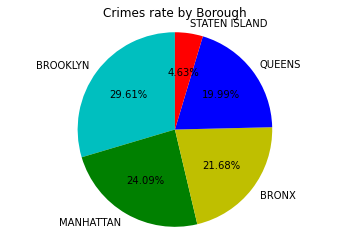

In [27]:
# Use the proportion of crime rate in each area to make a pie chart
x = top_crimes_prop['BORO_NM']
y = top_crimes_prop['propotion']
colors = ['c', 'g', 'y', 'b', 'r']

plt.pie(top_crimes_prop['propotion'], labels=top_crimes_prop['BORO_NM'], colors=colors,
        startangle=90,
        explode = (0, 0, 0,0 ,0),
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Crimes rate by Borough')
plt.show()

<AxesSubplot:title={'center':'Types of Crimes'}>

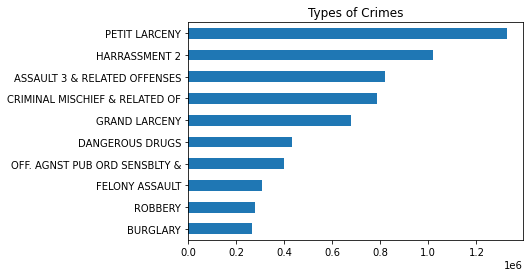

In [28]:
data_crime.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

<AxesSubplot:title={'center':'Total Crime Events by Month'}, xlabel='CMPLNT_FR_DT'>

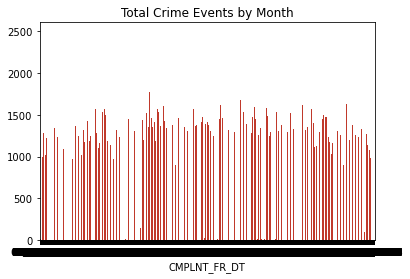

In [29]:
data_crime.groupby('CMPLNT_FR_DT').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

<AxesSubplot:title={'center':'Gender'}>

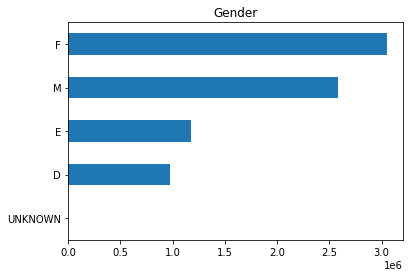

In [30]:
data_crime.VIC_SEX.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Gender")

<AxesSubplot:title={'center':'Race'}>

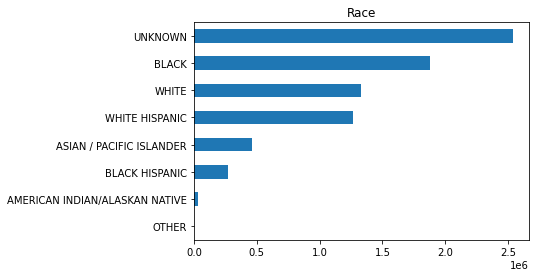

In [31]:
data_crime.VIC_RACE.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Race")

<AxesSubplot:title={'center':'Age'}>

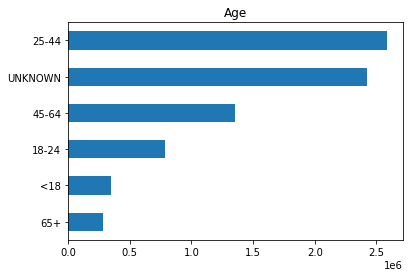

In [32]:
data_crime.VIC_AGE_GROUP.value_counts().iloc[:6].sort_values().plot(kind="barh", title = "Age")

array([<AxesSubplot:ylabel='OFNS_DESC'>], dtype=object)

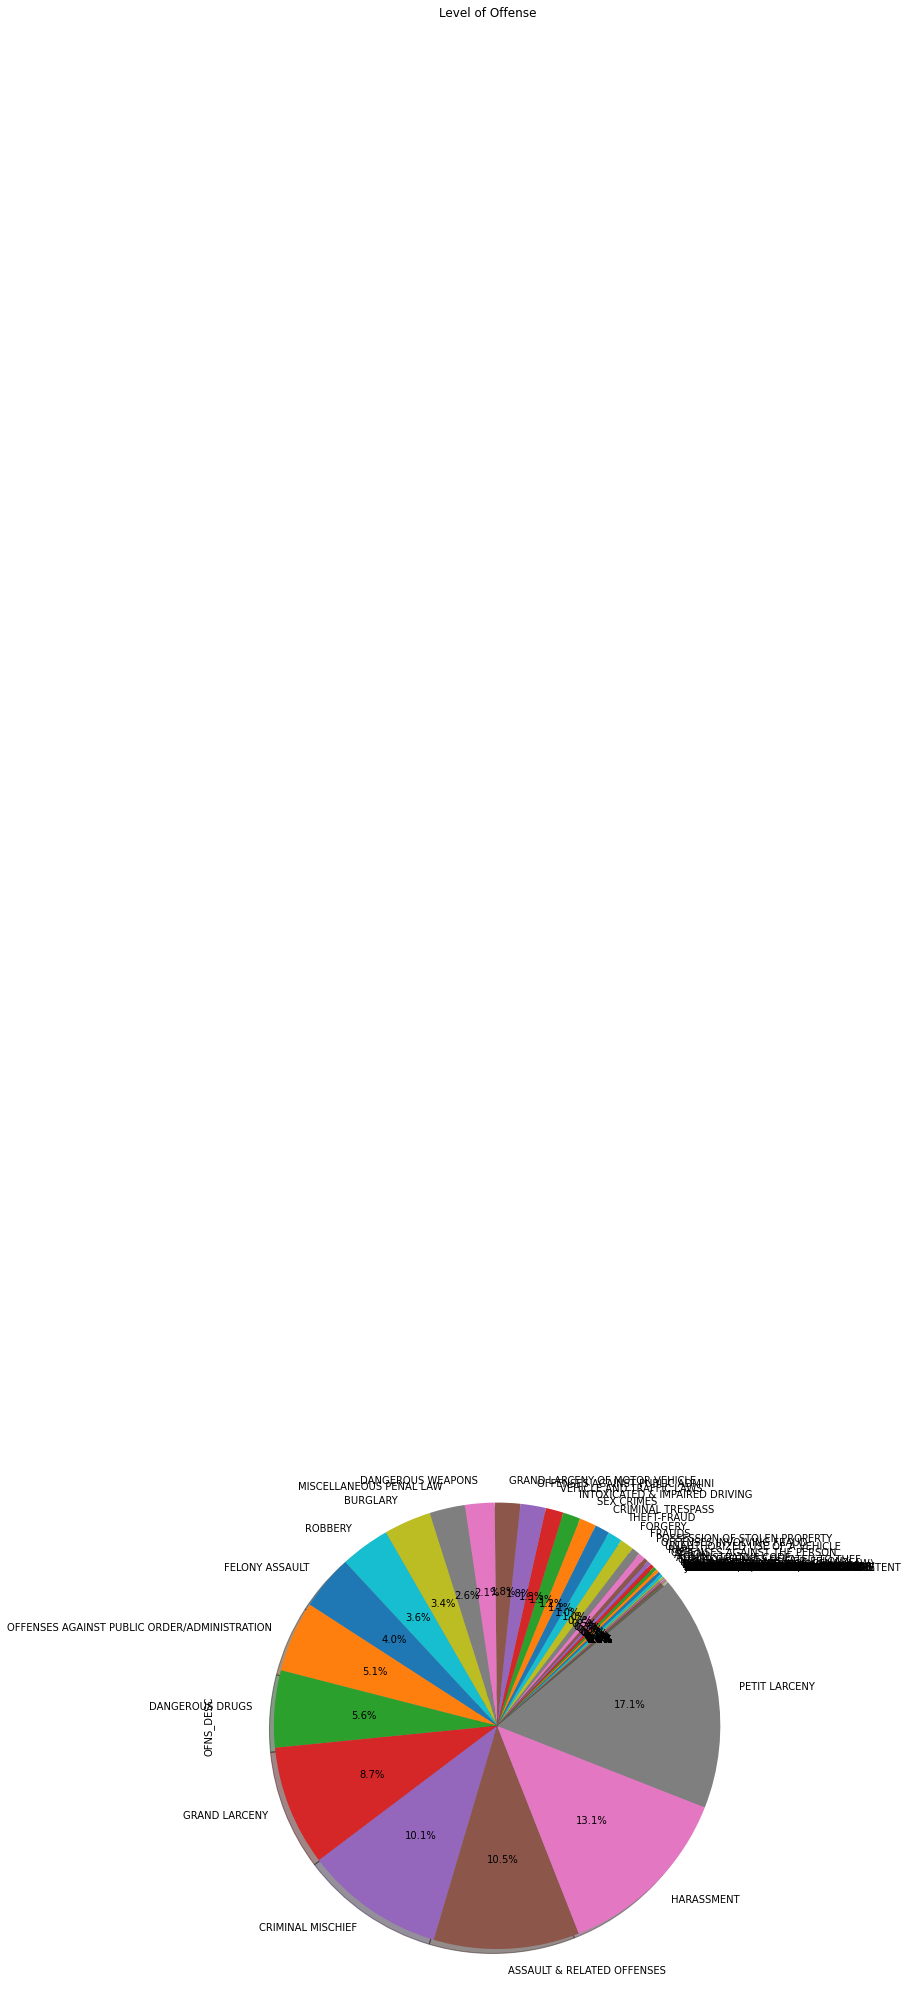

In [33]:
data_crime_clean['OFNS_DESC'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=400,
figsize=(10,50), autopct='%1.1f%%', title = 'Level of Offense')

<AxesSubplot:title={'center':'Total Crime Events by Year'}>

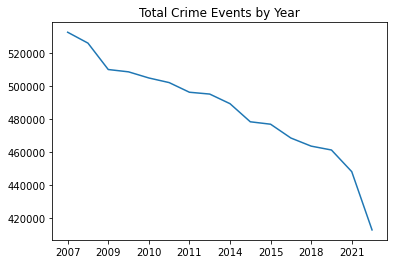

In [34]:
data_crime_clean['year'] = data_crime_clean['RPT_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
data_crime_clean['year'].value_counts().plot(kind="line", title = "Total Crime Events by Year")

In [35]:
sex_crimes = data_crime_clean[data_crime.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
20,354566222,12/19/2019,02:50:00,12/19/2019,104,RAPE,COMPLETED,FELONY,BRONX,INSIDE,N.Y. POLICE DEPT,"1,008,798","238,971",40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",<18,BLACK HISPANIC,FEMALE,2019
23,441714270,12/06/2019,11:30:00,12/19/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,N.Y. POLICE DEPT,"984,623","209,859",40.742699,-73.998655,"(40.74269929900004, -73.99865537999993)",25-44,UNKNOWN,FEMALE,2019
32,916011284,12/15/2019,09:30:00,12/15/2019,116,SEX CRIMES,COMPLETED,FELONY,BRONX,INSIDE,N.Y. POLICE DEPT,"1,006,434","244,344",40.837324,-73.919831,"(40.83732351100008, -73.91983075699994)",<18,BLACK,FEMALE,2019
34,465522474,12/05/2019,22:00:00,12/15/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,"999,794","241,252",40.828851,-73.943834,"(40.82885104500008, -73.94383419099995)",25-44,WHITE,FEMALE,2019
38,954653095,11/15/2017,20:00:00,12/13/2019,104,RAPE,COMPLETED,FELONY,QUEENS,INSIDE,N.Y. POLICE DEPT,"1,036,790","205,267",40.729939,-73.810433,"(40.729939364000074, -73.81043314199997)",18-24,WHITE,FEMALE,2019


7360.5


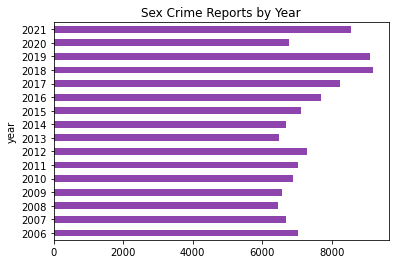

In [36]:
#plot graph
sex_crimes.groupby('year').size().plot(kind = 'barh', color = '#8E44AD', title = 'Sex Crime Reports by Year')

#average sex crimes per year
mean = sex_crimes['year'].value_counts().mean()
print(round(mean,2))

FEMALE                   83.224645
MALE                     14.875858
UNKNOWN                   1.789960
BUSINESS/ORGANIZATION     0.109537
Name: VIC_SEX, dtype: float64


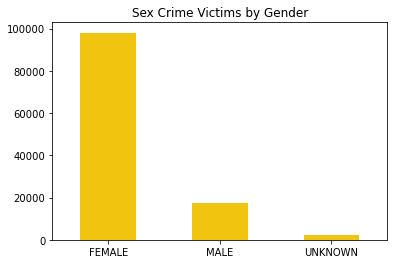

In [37]:
#plot graph
sex_crimes['VIC_SEX'].value_counts().iloc[:3].plot(kind="bar",  color = '#F1C40F', title = 'Sex Crime Victims by Gender', rot=0)

#victims by gender percentage
vic_sex_per = sex_crimes['VIC_SEX'].value_counts() / sex_crimes['VIC_SEX'].shape[0] *100
print(vic_sex_per)

BLACK                             32.663372
WHITE HISPANIC                    28.658040
WHITE                             16.543543
UNKNOWN                           10.095272
ASIAN / PACIFIC ISLANDER           6.146831
BLACK HISPANIC                     5.621221
AMERICAN INDIAN/ALASKAN NATIVE     0.269173
Name: VIC_RACE, dtype: float64


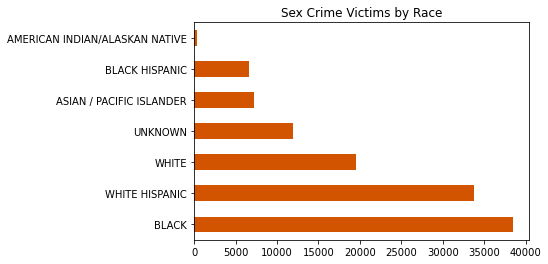

In [38]:
#plot graph
sex_crimes['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Sex Crime Victims by Race')

#victims by race percentage
vic_race_per = sex_crimes['VIC_RACE'].value_counts().iloc[:7] / sex_crimes['VIC_RACE'].shape[0] *100
print(vic_race_per)

<18      48.015590
25-44    23.234665
18-24    16.386455
45-64     4.997113
65+       0.594389
Name: VIC_AGE_GROUP, dtype: float64


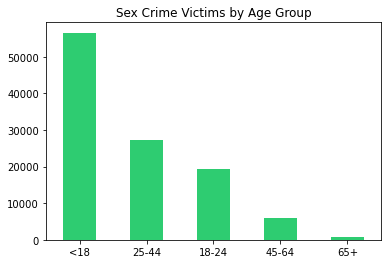

In [39]:
#plot graph
sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]].plot(kind="bar", color = '#2ECC71', title = 'Sex Crime Victims by Age Group', rot=0)

#victims by age percentage
vic_age_per = sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]] / sex_crimes['VIC_AGE_GROUP'].shape[0] *100
print(vic_age_per)

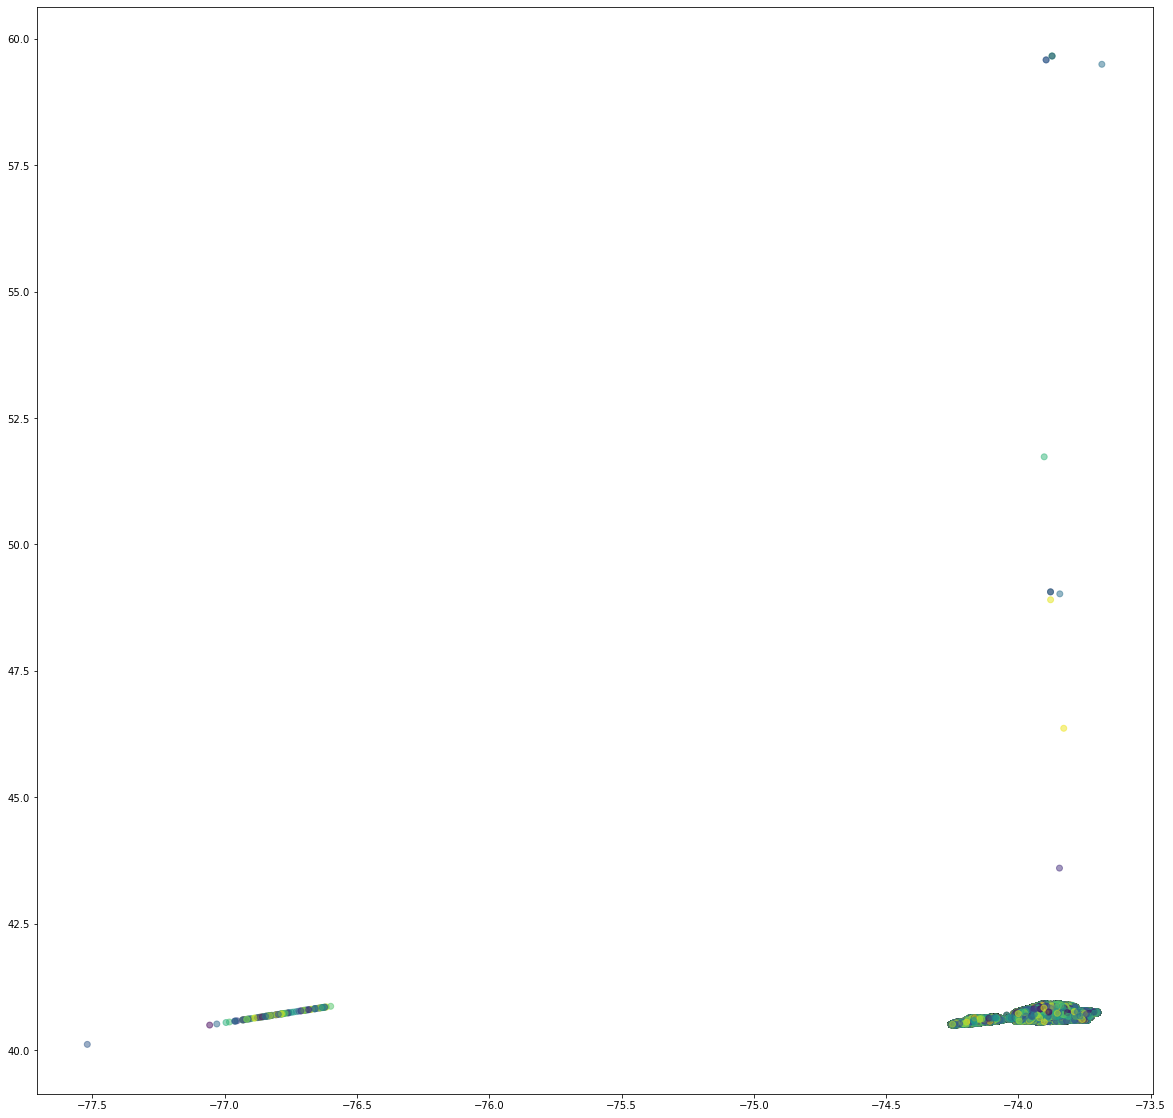

In [40]:
colors = np.random.rand(len(data_crime['Longitude']))

plt.figure(figsize=(20,20))
plt.scatter(data_crime['Longitude'], data_crime['Latitude'],c=colors, alpha=0.5)
plt.show()

In [41]:
#Pickup location for train dataset
import folium # goelogical map
map_1 = folium.Map(location=[40.767937,-73.982155 ],tiles='OpenStreetMap',
 zoom_start=12)
for each in crime_map[:1000].iterrows():
    folium.CircleMarker([each[1]['Latitude'],each[1]['Longitude']],
                        radius=3,
                        color='blue',
                        popup=str(each[1]['Latitude'])+','+str(each[1]['Longitude']),
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1


  

In [42]:
data_crime.dropna(subset=['CMPLNT_FR_DT'], inplace=True)
data_crime.dropna(subset=['CMPLNT_FR_TM'], inplace=True)

In [43]:
data_crime.replace('UNKNOWN', np.NaN, inplace=True)
data_crime.replace('E', np.NaN, inplace=True)
data_crime.replace('D', np.NaN, inplace=True)
data_crime.replace('U', np.NaN, inplace=True)

<AxesSubplot:title={'center':'Gender'}>

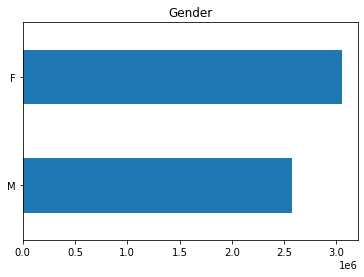

In [44]:
data_crime.VIC_SEX.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Gender")

In [45]:
print('Number of rows before removing rows with missing values: ' + str(data_crime.shape[0]))
data_crime.dropna(axis=0, inplace=True)
print('Number of rows after removing rows with missing values: ' + str(data_crime.shape[0]))

Number of rows before removing rows with missing values: 7776644
Number of rows after removing rows with missing values: 4237388


# change Change time format

In [46]:
# import a new library
from datetime import datetime

In [47]:
data_crime['CMPLNT_FR_YEAR'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(str(x).split('/')[2]))
data_crime['CMPLNT_FR_YEAR'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(str(x).split('/')[2]))
data_crime['CMPLNT_FR_MONTH'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[0]))
data_crime['CMPLNT_FR_DAY'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[1]))
data_crime['CMPLNT_FR_HOUR'] = data_crime['CMPLNT_FR_TM'].map(lambda x: int(x.split(':')[0]))

In [48]:
pd.unique(data_crime.CMPLNT_FR_YEAR)

array([2019, 2017, 1974, 2008, 2012, 2018, 2011, 2004, 2016, 2015, 2013,
       2009, 2001, 2010, 1994, 2014, 2020, 1983, 2003, 1991, 2005, 1978,
       1993, 2006, 1979, 1980, 2000, 1019, 1997, 1990, 1977, 1999, 1984,
       2007, 1998, 1920, 1996, 1949, 1919, 1965, 2002, 1985, 1995, 1972,
       1029, 1970, 1987, 1975, 1992, 1971, 1989, 1960, 1982, 1981, 1918,
       1018, 2021, 1021, 1921, 1986, 1973, 1966, 1955, 1976, 1988, 1914,
       1016, 1942, 1916, 1015, 1915, 1913, 1017, 1950, 1967, 1027, 1968,
       1010, 1969, 1941, 1959, 1917, 1954, 1945, 1026, 1911, 1947, 1946,
       1912, 1957, 1930, 1910, 1906, 1908, 1922, 1940, 1900, 1905, 1929,
       1909, 1962, 1961, 1956, 1948, 1938, 1964, 1028, 1951])

In [49]:
columns_remove = ['CMPLNT_FR_TM', 'CMPLNT_FR_DT','CMPLNT_FR_YEAR']
data_crime = data_crime.drop(columns_remove, axis=1)

In [50]:
data_crime_clean

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
0,394506329,12/31/2019,17:30:00,12/31/2019,118,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,"999,937","238,365",40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",UNKNOWN,UNKNOWN,UNKNOWN,2019
1,968873685,12/29/2019,16:31:00,12/29/2019,113,FORGERY,COMPLETED,FELONY,BRONX,UNKNOWN,N.Y. POLICE DEPT,"1,022,508","261,990",40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",UNKNOWN,UNKNOWN,UNKNOWN,2019
2,509837549,12/15/2019,18:45:00,12/29/2019,578,HARASSMENT,COMPLETED,VIOLATION,QUEENS,FRONT OF,N.Y. POLICE DEPT,"1,034,178","209,758",40.742281,-73.819824,"(40.74228115600005, -73.81982408)",25-44,WHITE HISPANIC,FEMALE,2019
3,352454313,12/28/2019,01:00:00,12/28/2019,126,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,N.Y. POLICE DEPT,"1,026,412","258,211",40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",UNKNOWN,UNKNOWN,UNKNOWN,2019
5,293718737,12/27/2019,22:00:00,12/27/2019,107,BURGLARY,ATTEMPTED,FELONY,MANHATTAN,FRONT OF,N.Y. POLICE DEPT,"989,665","201,866",40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",UNKNOWN,UNKNOWN,MALE,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,744350707,12/17/2018,03:00:00,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,COMPLETED,MISDEMEANOR,BRONX,FRONT OF,N.Y. HOUSING POLICE,"1,026,486","262,591",40.887333,-73.847250,"(40.887332818, -73.847250013)",25-44,WHITE HISPANIC,FEMALE,2018
7825495,380927470,06/05/2018,23:30:00,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,COMPLETED,FELONY,BRONX,FRONT OF,N.Y. POLICE DEPT,"1,018,029","240,747",40.827414,-73.877946,"(40.827414051, -73.877945775)",25-44,BLACK,MALE,2018
7825496,502083804,02/10/2018,08:30:00,02/10/2018,341,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,INSIDE,N.Y. POLICE DEPT,"1,010,861","243,330",40.834528,-73.903836,"(40.834528146, -73.903836069)",45-64,BLACK,FEMALE,2018
7825497,609916130,12/11/2018,07:30:00,12/11/2018,344,ASSAULT & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,N.Y. POLICE DEPT,"1,001,322","235,045",40.811812,-73.938329,"(40.81181176, -73.938328651)",<18,BLACK,MALE,2018


In [51]:
import sklearn.datasets as sk
X, y = sk.make_classification(n_samples=290000, 
                              n_features=11, n_informative=5, n_redundant=5, n_classes=2, 
                              n_clusters_per_class=2, weights=None, random_state=1)
print(X)
print(y)

[[ 0.02230233  2.32914835 -0.55871595 ...  0.67732838  0.4115663
  -1.01934883]
 [-0.71376902 -0.08350369 -1.49420042 ... -3.83098205  2.35485992
   3.82277027]
 [-0.38908489  0.46860256 -1.89068343 ...  0.25193787  1.30662102
  -1.46339161]
 ...
 [-1.72432237 -0.26313212 -1.56984411 ... -1.24434297 -1.50570374
  -3.10369996]
 [ 1.32712921  0.15382115  2.52557894 ... -8.78075202 -1.64075021
  10.4566219 ]
 [ 0.12068731 -1.11553898 -1.99679729 ... -1.80483647 -1.73113083
  -2.59898537]]
[0 1 1 ... 1 0 1]


```
# Traning  Data
```
#20% traning 80% testing

In [52]:
X_test = data_crime.drop('OFNS_DESC', axis = 1)
y_test = data_crime['OFNS_DESC'].copy().to_frame()
print('X shape: ' + str(X.shape))
print('y shape: ' + str(y.shape))

X shape: (290000, 11)
y shape: (290000,)


In [53]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [54]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Randomly choose 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)# Data scaling the X set

In [55]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_train.shape)
print('Testing Features Shape:', y_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (232000, 11)
Training Labels Shape: (232000, 11)
Testing Features Shape: (58000,)
Testing Labels Shape: (58000,)


# Predications

# **Artificial Neural Network**

In [56]:
# Transforming the gender variable, labels are chosen randomly
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])
print(X)

[[ 2.23023323e-02  2.32914835e+00  1.50346000e+05 ...  6.77328382e-01
   4.11566301e-01 -1.01934883e+00]
 [-7.13769017e-01 -8.35036947e-02  7.57770000e+04 ... -3.83098205e+00
   2.35485992e+00  3.82277027e+00]
 [-3.89084886e-01  4.68602562e-01  4.99540000e+04 ...  2.51937867e-01
   1.30662102e+00 -1.46339161e+00]
 ...
 [-1.72432237e+00 -2.63132119e-01  7.03960000e+04 ... -1.24434297e+00
  -1.50570374e+00 -3.10369996e+00]
 [ 1.32712921e+00  1.53821149e-01  2.79669000e+05 ... -8.78075202e+00
  -1.64075021e+00  1.04566219e+01]
 [ 1.20687310e-01 -1.11553898e+00  4.41780000e+04 ... -1.80483647e+00
  -1.73113083e+00 -2.59898537e+00]]


In [57]:
from sklearn.compose import ColumnTransformer
# Transforming the geography column variable, labels are chosen randomly, the ct asks for argument [1] the index of the target vb
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
print(X)

  (0, 287086)	1.0
  (0, 290000)	0.02230233226046019
  (0, 290001)	150346.0
  (0, 290002)	-0.032375474658952796
  (0, 290003)	0.5232930123282526
  (0, 290004)	0.9605536569570923
  (0, 290005)	0.0868061454668625
  (0, 290006)	1.1370130836364507
  (0, 290007)	0.6773283816135777
  (0, 290008)	0.4115663013115295
  (0, 290009)	-1.0193488267079736
  (1, 135466)	1.0
  (1, 290000)	-0.7137690167327488
  (1, 290001)	75777.0
  (1, 290002)	-1.4052335078698848
  (1, 290003)	1.292277086780842
  (1, 290004)	-2.4230789914273823
  (1, 290005)	2.002150844297918
  (1, 290006)	0.9252942974491141
  (1, 290007)	-3.8309820530338783
  (1, 290008)	2.3548599238055967
  (1, 290009)	3.822770273348227
  (2, 197316)	1.0
  (2, 290000)	-0.3890848860478502
  (2, 290001)	49954.0
  :	:
  (289997, 290007)	-1.2443429702755946
  (289997, 290008)	-1.5057037439550367
  (289997, 290009)	-3.1036999585529723
  (289998, 162700)	1.0
  (289998, 290000)	1.3271292112227042
  (289998, 290001)	279669.0
  (289998, 290002)	-2.75165121503

In [58]:
# Data Scaling/normalization of the features that will go to the NN
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
#----------------------- Building the model -----------------------#

# Initializing the ANN by calling the Sequential class fromm keras of Tensorflow
ann = tf.keras.models.Sequential()

#----------------------------------------------------------------------------------
# Adding "fully connected" INPUT layer to the Sequential ANN by calling Dense class
#----------------------------------------------------------------------------------
# Number of Units = 6 and Activation Function = Rectifier
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))


#----------------------------------------------------------------------------------
# Adding "fully connected" SECOND layer to the Sequential AMM by calling Dense class
#----------------------------------------------------------------------------------
# Number of Units = 6 and Activation Function = Rectifier
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))


#----------------------------------------------------------------------------------
# Adding "fully connected" OUTPUT layer to the Sequential ANN by calling Dense class
#----------------------------------------------------------------------------------
# Number of Units = 1 and Activation Function = Sigmoid
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#----------------------- Training the model -----------------------#
# Compiling the ANN
# Type of Optimizer = Adam Optimizer, Loss Function =  crossentropy for binary dependent variable, and Optimization is done w.r.t. accuracy
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN model on training set  (fit method always the same)
# batch_size = 32, the default value, number of epochs  = 100
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

2022-08-07 21:00:08.258206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-07 21:00:08.258241: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-07 21:00:08.258268: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (w-jayua-project-76f22842b3ba40679b396432f0e6d8e8-bbd65676-95llh): /proc/driver/nvidia/version does not exist
2022-08-07 21:00:08.260183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
7250/7250 [==============================] - 10s 1ms/step - loss: 0.3331 - accuracy: 0.8326
Epoch 2/100
7250/7250 [==============================] - 10s 1ms/step - loss: 0.2529 - accuracy: 0.8890
Epoch 3/100
7250/7250 [==============================] - 9s 1ms/step - loss: 0.2194 - accuracy: 0.9107
Epoch 4/100
7250/7250 [==============================] - 9s 1ms/step - loss: 0.1762 - accuracy: 0.9358
Epoch 5/100
7250/7250 [==============================] - 9s 1ms/step - loss: 0.1663 - accuracy: 0.9405
Epoch 6/100
7250/7250 [==============================] - 9s 1ms/step - loss: 0.1565 - accuracy: 0.9455
Epoch 7/100
7250/7250 [==============================] - 9s 1ms/step - loss: 0.1511 - accuracy: 0.9484
Epoch 8/100
7250/7250 [==============================] - 10s 1ms/step - loss: 0.1487 - accuracy: 0.9500
Epoch 9/100
7250/7250 [==============================] - 9s 1ms/step - loss: 0.1466 - accuracy: 0.9507
Epoch 10/100
7250/7250 [==============================] - 9s 1ms/step 

In [60]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1]])))
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1]])) > 0.5)

1/1 [==============================] - 0s 102ms/step
[[0.]]
1/1 [==============================] - 0s 19ms/step
[[False]]


In [61]:
#show the vector of predictions and real values
#probabilities
y_pred_prob = ann.predict(X_test)

1813/1813 [==============================] - 2s 975us/step


In [62]:
#probabilities to binary
y_pred = (y_pred_prob > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", confusion_matrix)
print("Accuracy Score", accuracy_score(y_test, y_pred))

Confusion Matrix [[27423  1304]
 [  979 28294]]
Accuracy Score 0.9606379310344828


In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Precision: 0.948283
Recall: 0.963379
F1 score: 0.955772




```
# **SVM**
```

# SVM

In [74]:
from sklearn.svm import LinearSVC
svclassifier = LinearSVC(class_weight='balanced')
svclassifier.fit(X_train, y_train)

/srv/conda/envs/saturn/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced')

In [75]:
y_pred = svclassifier.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
Classifier_predications = svclassifier.predict(X_test)
print (accuracy_score(y_test, Classifier_predications)*100)

75.42241379310344


In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix
ypred=svclassifier.predict(X_test)
accuracy = accuracy_score(y_test,ypred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, ypred)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.7542241379310345
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     31244
           1       0.71      0.78      0.75     26756

    accuracy                           0.75     58000
   macro avg       0.75      0.76      0.75     58000
weighted avg       0.76      0.75      0.75     58000

Confusion matrix:
[[22858  5869]
 [ 8386 20887]]


In [78]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.7135244081576879


In [79]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.7315964665215722


In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score for svclassifier: ', roc_auc_score(y_test, y_pred))

roc_auc_score for svclassifier:  0.7546109178324555


In [81]:
decision_scores = svclassifier.decision_function(X_test)
fpr, tpr, thres = roc_curve(y_test, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_test, decision_scores)))

AUC: 0.819


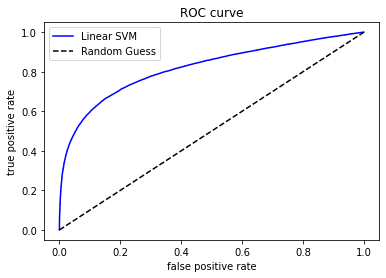

In [82]:
# roc curve
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()



```
### Random Forest
```

#Random Forest

In [65]:
param_grid = {
  
    'n_estimators': [100, 200, 300, 1000,10000]
}

print (param_grid)

{'n_estimators': [100, 200, 300, 1000, 10000]}


In [66]:
from sklearn.model_selection import GridSearchCV
# Training with Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf , param_grid = param_grid, cv = 5, n_jobs = -1)

In [67]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

In [68]:
#print classification report for model
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     28727
           1       0.96      0.97      0.96     29273

    accuracy                           0.96     58000
   macro avg       0.96      0.96      0.96     58000
weighted avg       0.96      0.96      0.96     58000



In [101]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.9620678673790737


In [102]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.9633792231749394


In [71]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

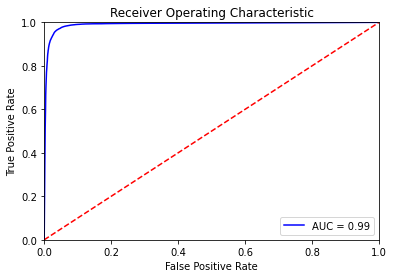

In [72]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#LinearRegression

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
lr.score(X_train, y_train)

0.2965493499608566

In [86]:
# Make predictions for the test set
y_pred = lr.predict(X_test)


```
# GaussianNB
```
# GaussianNB

In [87]:
#I use Gussian as GNB for short
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [88]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.7734310344827586


In [89]:
y_pred = nb.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
ypred=nb.predict(X_test)
accuracy = accuracy_score(y_test,ypred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, ypred)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.7734310344827586
              precision    recall  f1-score   support

           0       0.69      0.83      0.75     23936
           1       0.86      0.74      0.79     34064

    accuracy                           0.77     58000
   macro avg       0.77      0.78      0.77     58000
weighted avg       0.79      0.77      0.78     58000

Confusion matrix:
[[19761  8966]
 [ 4175 25098]]


In [91]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.8573771051822499


In [92]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.8255765374331551


In [93]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

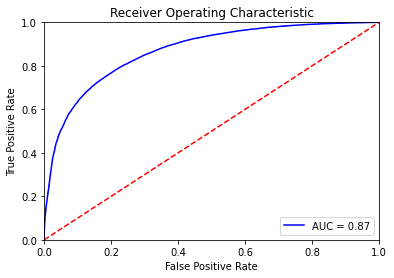

In [94]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

```
# KNN
```
## KNN

In [95]:
kn = KNeighborsClassifier(n_neighbors = 5)
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred = kn.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.955


In [98]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27189  1538]
 [ 1072 28201]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     28727
           1       0.95      0.96      0.96     29273

    accuracy                           0.95     58000
   macro avg       0.96      0.95      0.95     58000
weighted avg       0.96      0.95      0.95     58000



In [99]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.9620678673790737


In [100]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.9633792231749394
